In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## About this data
This [dataset](https://www.kaggle.com/andrewmvd/data-analyst-jobs) was created by [picklesueat](https://github.com/picklesueat/data_jobs_data) and contains more than 2000 job listing for data analyst positions, with features such as:

- Salary Estimate
- Location
- Company Rating
- Job Description
- and more.

## List of things we will explore:
- Which sectors and industries pay the highest?
- Which sectors and industries have the most available jobs?
 > There's no point finding out which industry/sectors pays handsomely if there are only a handful of jobs available right?
- The top and bottom 25 cities in terms of salaries
- States that pay the best salaries
- Effect of Company Size/Age on salaries
 > Do larger or older companies pay more? We find out!
- How much better do senior-level jobs pay?

First, let's read in the data and have a feel of what it looks like.

In [7]:
df = pd.read_csv('DataAnalyst.csv')
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
5,5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
6,6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),Two Sigma is a different kind of investment ma...,4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,7,Data Science Analyst,$37K-$66K (Glassdoor est.),Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
8,8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1
9,9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),About Us\n\nRiskified is the AI platform power...,4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",-1


Now let's look a the type of columns we have:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
Unnamed: 0           2253 non-null int64
Job Title            2253 non-null object
Salary Estimate      2253 non-null object
Job Description      2253 non-null object
Rating               2253 non-null float64
Company Name         2252 non-null object
Location             2253 non-null object
Headquarters         2253 non-null object
Size                 2253 non-null object
Founded              2253 non-null int64
Type of ownership    2253 non-null object
Industry             2253 non-null object
Sector               2253 non-null object
Revenue              2253 non-null object
Competitors          2253 non-null object
Easy Apply           2253 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 281.7+ KB


### The first look at the data tells us there are 15 columns. Some ideas about what this EDA can explore are:
- Which sector/industry pays more?
- What's the range of salaries for different seniorities
- Does the size of the company have an impact on salary?
- Does the length of the job description correlate with the salary?
- Do certain locations pay more?

## Which sector pays the highest?

![](http://)Since salary estimates are presented in a range, it could be useful to transform it into a median salary

In [9]:
df['low_bound_sal'] = df['Salary Estimate'].apply(lambda x : (x.split()[0]).split('-')[0] if x != '-1' else x)
df['upp_bound_sal'] = df['Salary Estimate'].apply(lambda x : (x.split()[0]).split('-')[1] if x != '-1' else x)

df['upp_bound_sal'] = df['upp_bound_sal'].apply(lambda x : x[1:-1] if x != '-1' else x)
df['low_bound_sal'] = df['low_bound_sal'].apply(lambda x : x[1:-1] if x != '-1' else x)

df['upp_bound_sal'] = df['upp_bound_sal'].apply(pd.to_numeric)
df['low_bound_sal'] = df['low_bound_sal'].apply(pd.to_numeric)

df['median_sal'] = (df['upp_bound_sal'] + df['low_bound_sal'])/2 * 1000

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]), <a list of 10 Text xticklabel objects>)

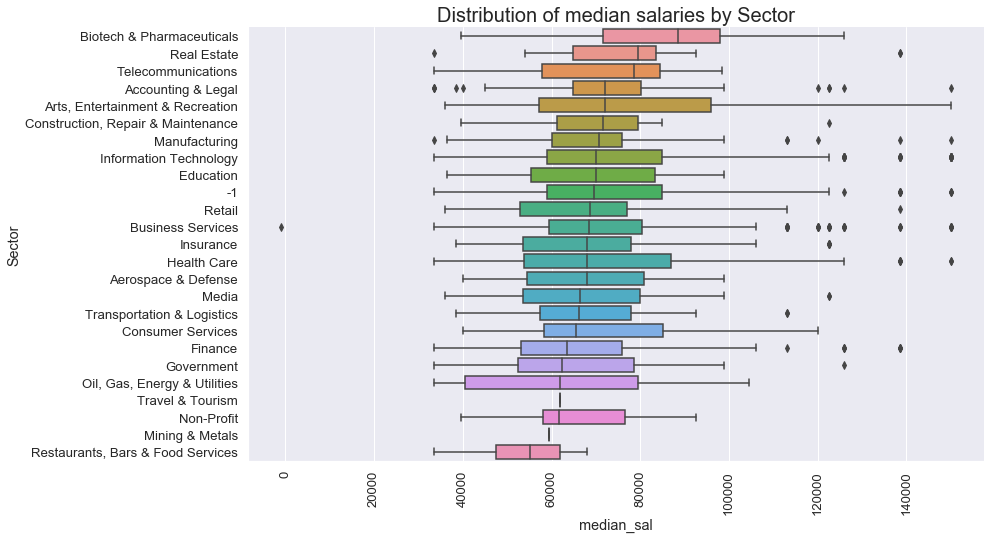

In [10]:
sns.set(font_scale=1.2)
sns.catplot(y='Sector', x='median_sal', kind='box' ,data=df, height=7, aspect=2, \
           order=df.groupby('Sector')['median_sal'].median().sort_values(ascending=False).index)
plt.title('Distribution of median salaries by Sector',fontsize='20')
plt.xticks(rotation=90)

- Judging by the median lines, it looks like chossing **Biotech** offers the highest chance of getting a higher salary. 
- Seperately, the **Arts & Entertainment** sector has HUGE variation, an analyst role pays anywhere from roughly `$40,000` to over `$140,000`
- **'Restaurants, Bars & Food Services'** isn't a great place to look if you want higher salaries as the range is pretty limited and it has the lowest median

## Which industry pays the highest?

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]), <a list of 10 Text xticklabel objects>)

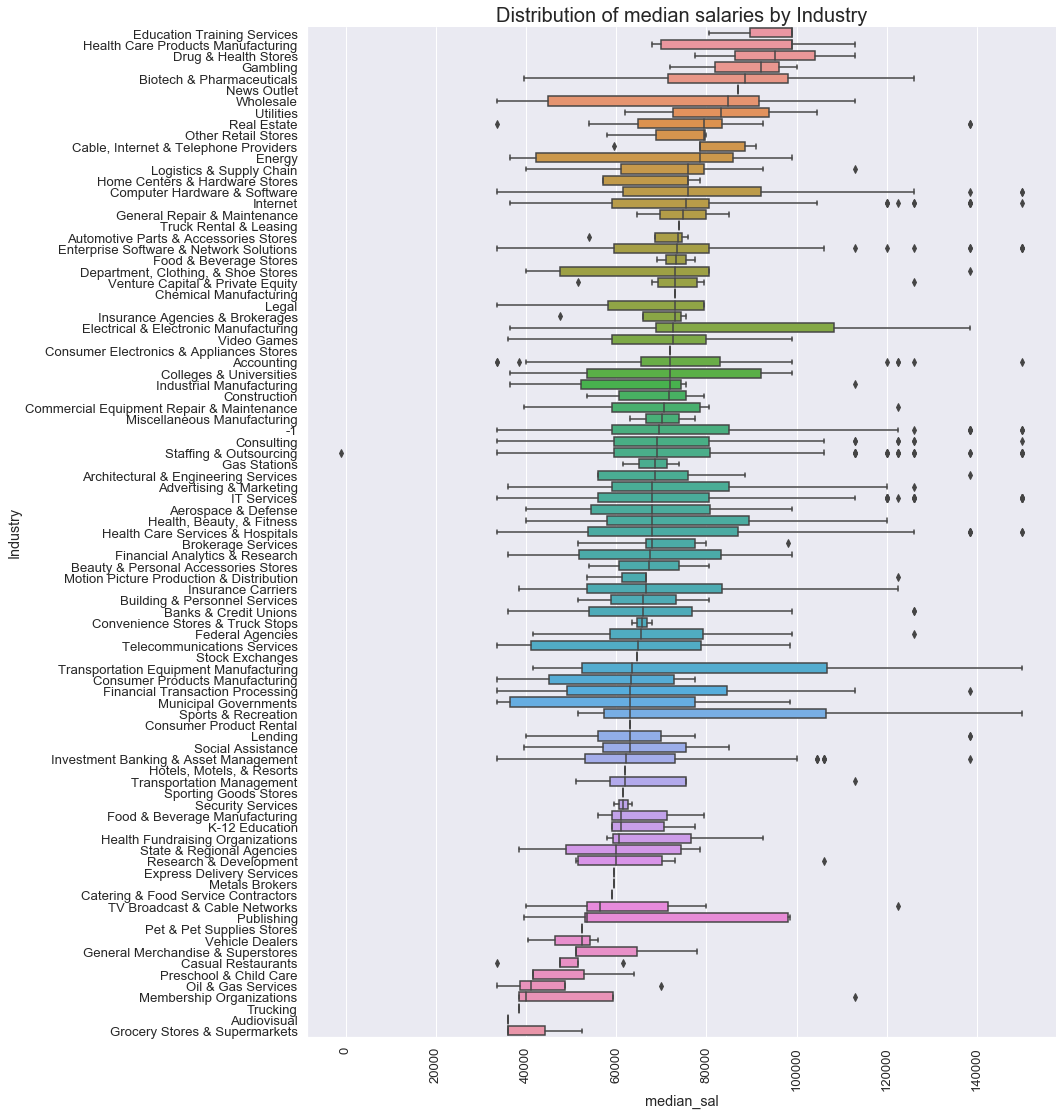

In [11]:
sns.set(font_scale=1.2)
sns.catplot(y='Industry', x='median_sal', kind='box', data=df, height=15, aspect=1, order=df.groupby('Industry')['median_sal'].median().sort_values(ascending=False).index)
plt.title('Distribution of median salaries by Industry', fontsize='20')
plt.xticks(rotation=90)

There's a long list of industries here but the top 5 paying are:
- Education Training Services  
- Health Care Products Manufacturing 
- Drug & Health Stores
- Gambling
- Biotech & Pharmaceuticals

Out of the top 5, having **Education Training Services** as the top paying is a little surprising to me, maybe they're hiring data analyst instructors? 

And the bottom 5 are:
- Oil & Gas Services
- Membership Organizations
- Trucking
- Audiovisual
- Grocery Stores & Supermarkets 

## Which sector and industry is hiring the most?

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text xticklabel objects>)

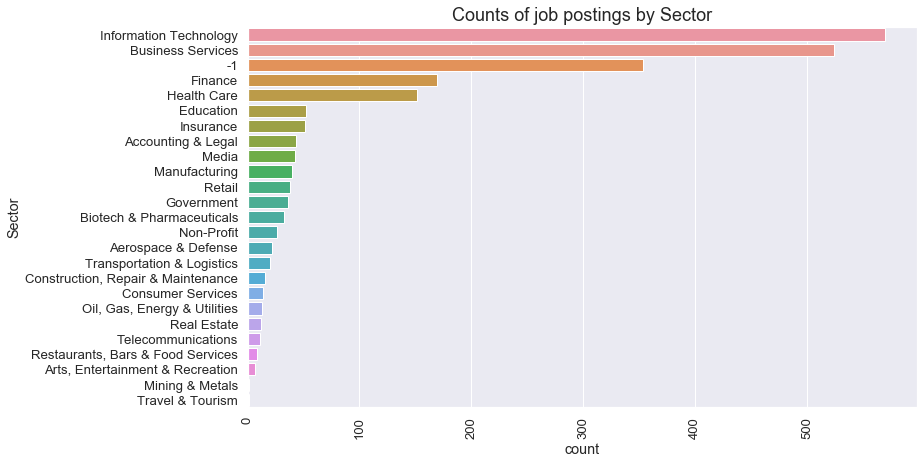

In [12]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=1.2)
sns.countplot(y='Sector', data=df, order=df['Sector'].value_counts().index)
plt.title('Counts of job postings by Sector', fontsize='18')
plt.xticks(rotation=90)

Information Technology and Business Services are by far the sectors that are hiring the most data analysts

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

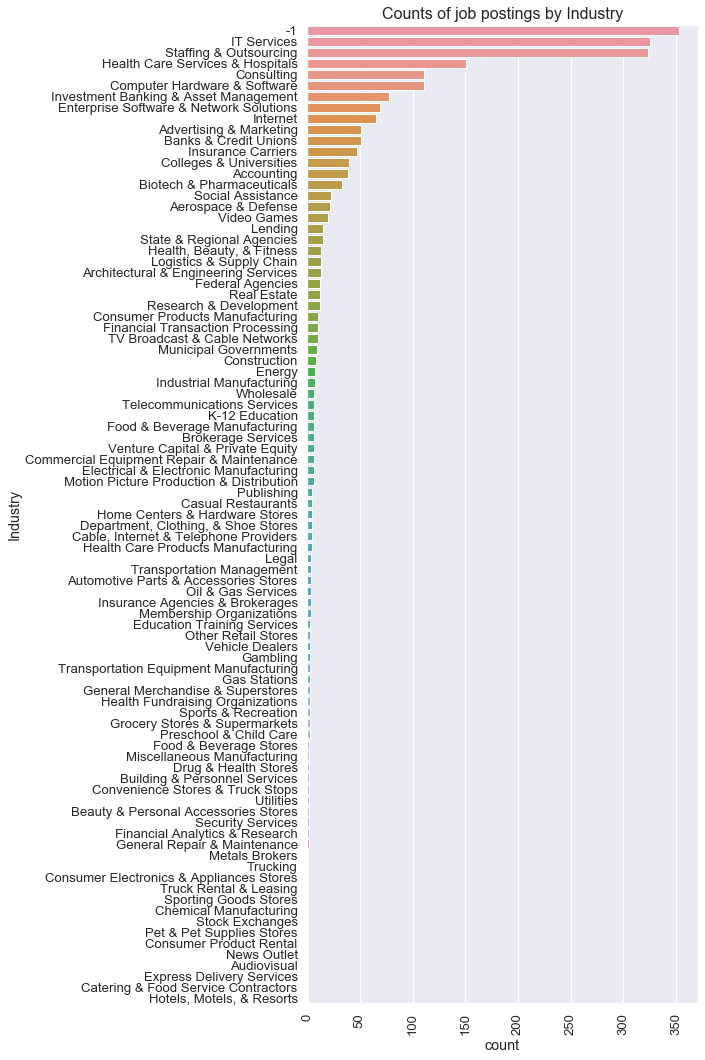

In [13]:
plt.figure(figsize=(7, 18))
sns.set(font_scale=1.2)
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index)
plt.title('Counts of job postings by Industry', fontsize='16')
plt.xticks(rotation=90)

Apart from the missing data (-1), **'IT Services'** and **'Staffing & Outsourcing'** are by far the 2 industries with the highest counts of job posting.

## Salaries by Location

In [14]:
count = df['Location'].nunique()

print(f'There are {count} unique cities')

There are 253 unique cities


Since there are 253 different locations,it might be ideal to show the the top and bottom 25 in terms of median salary. We can also aggregate it by state by creating a new column.

### Salaries by Location (Top 25 Cities)

(array([ 40000.,  60000.,  80000., 100000., 120000., 140000., 160000.]),
 <a list of 7 Text xticklabel objects>)

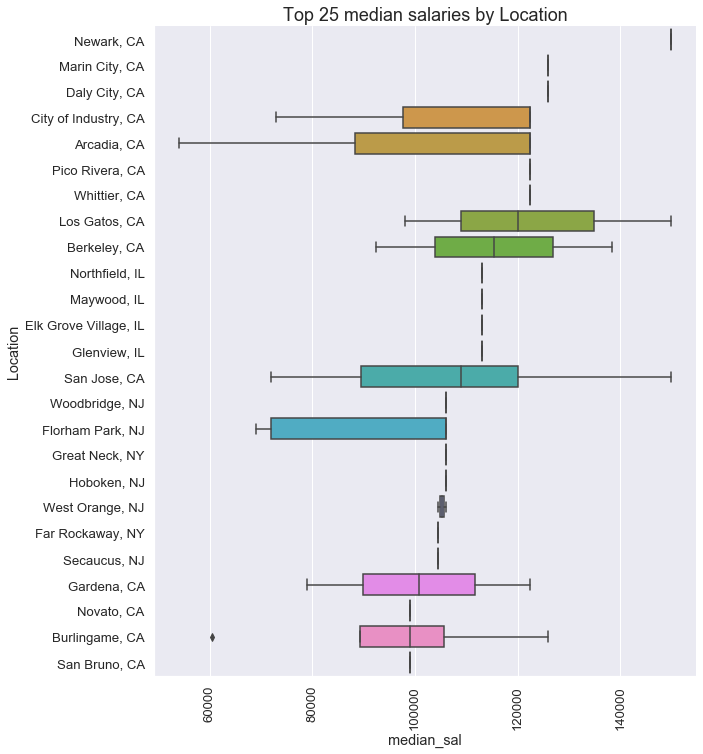

In [15]:
sns.set(font_scale=1.2)
sns.catplot(y='Location', x='median_sal', kind='box', data=df, height=10, aspect=1, order=df.groupby('Location')['median_sal'].median().sort_values(ascending=False).iloc[:25].index)

plt.title('Top 25 median salaries by Location', fontsize='18')
plt.xticks(rotation=90)

These are definitely the cities to be looking out for jobs but the sparsity of data for half the cities doesn't give a good sample of the salaries. It might be better if we can look at more aggregated data eg. at the state level. But from the looks of it, majority of the cities are in CA

### Salaries by Location (Bottom 25 Cities)

(array([ 30000.,  40000.,  50000.,  60000.,  70000.,  80000.,  90000.,
        100000.]), <a list of 8 Text xticklabel objects>)

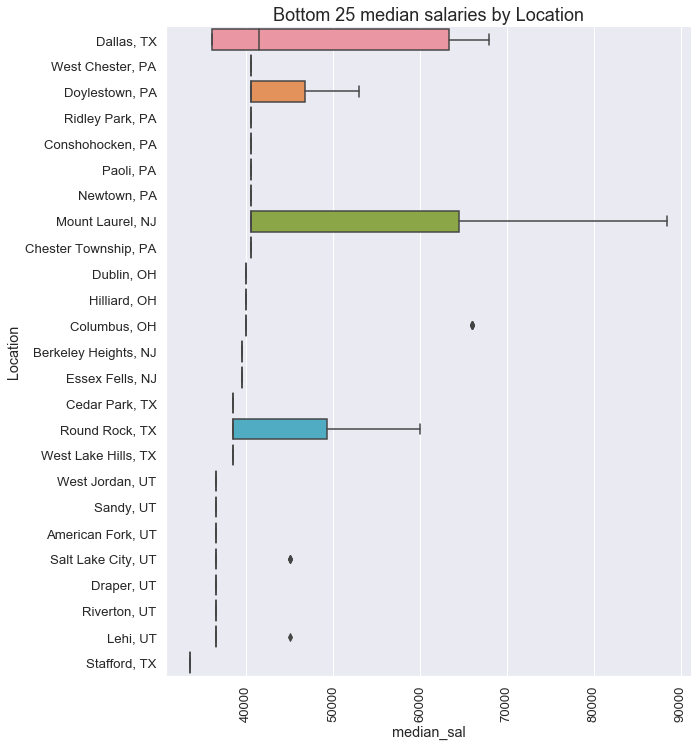

In [16]:
sns.set(font_scale=1.2)
sns.catplot(y='Location', x='median_sal', kind='box', data=df, height=10, aspect=1, order=df.groupby('Location')['median_sal'].median().sort_values(ascending=False).iloc[-25:].index)

plt.title('Bottom 25 median salaries by Location', fontsize='18')
plt.xticks(rotation=90)

Same data sparsity issue when we look at the bottom 25. Most of the cities seem to be in UT and PA.

### Salaries by Location (States)

In [17]:
# create the state column
df['state'] = df['Location'].apply(lambda x : x.split(',')[-1])

In [18]:
count = df['state'].nunique()
print(f'There are {count} states')

There are 19 states


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]), <a list of 10 Text xticklabel objects>)

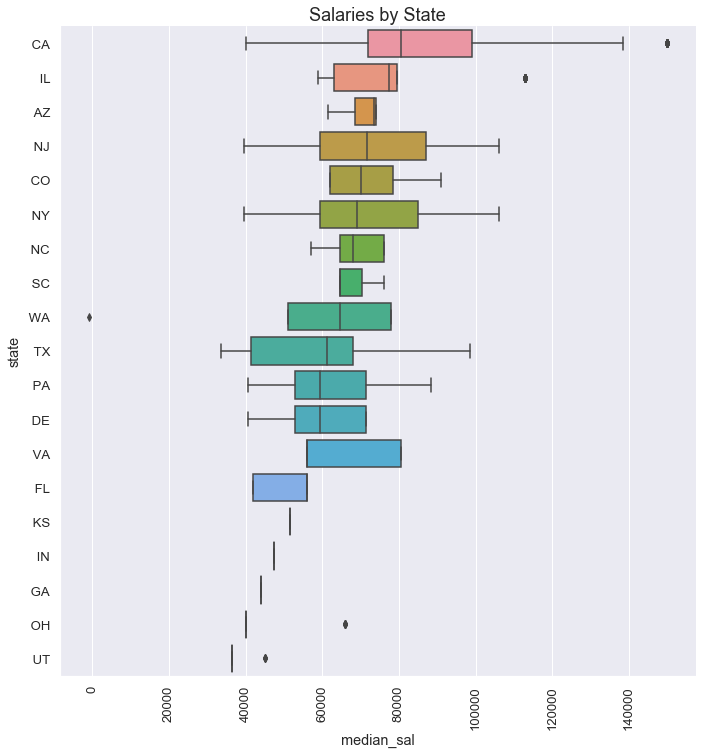

In [19]:
sns.set(font_scale=1.2)
sns.catplot(y='state', x='median_sal', kind='box', data=df, height=10, aspect=1, order=df.groupby('state')['median_sal'].median().sort_values(ascending=False).index)

plt.title('Salaries by State', fontsize='18')
plt.xticks(rotation=90)

This looks way better now and as we guessed earlier, CA is the state with the highest salaries. But it also has the largest range of salaries. IL in second place has a much tighter distribution of salaries and you can be sure your salary is almost at last $60,000.

## Effect of Size/Age of Company on Salary

One would think that more established companies (bigger and older) would be in a better financial position to pay more but on the flip side, startups that are well funded, especially in silicon valley, would also need to offer competitive salaries to attract talent. Let's find out if there is a relationship between Salaries and Size/Age of a company.

In [20]:
df['Age'] = df['Founded'].apply(lambda x : (2020 - x) if x != -1 else x)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

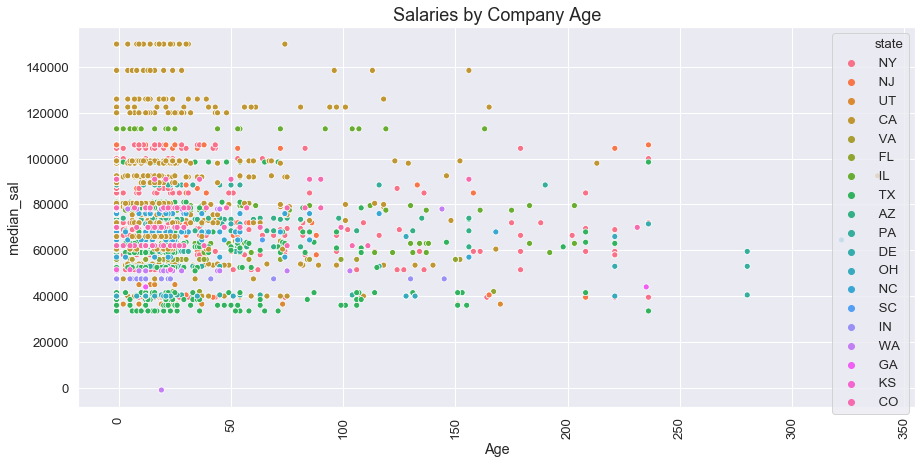

In [21]:
sns.set(font_scale=1.2)
sns.set_palette("Paired")
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Age', y='median_sal', data=df[df['Age'] != 1], hue='state')

plt.title('Salaries by Company Age', fontsize='18')
plt.xticks(rotation=90)

I also took the liberty to add a colour code to the scatterplot to show the differences between states.

A couple of interesting observations here:
- There's also a downward trend in salaries as the `Age` of the company increases, disproving our earlier theory that more established companies would pay more.
- Younger companies are hiring more data analyst roles. 
- After the company age of 50 is where we start to see job postings getting lesser.
- Like we've seen before, CA takes the top slot in terms of high salaried data analyst roles 

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]), <a list of 10 Text xticklabel objects>)

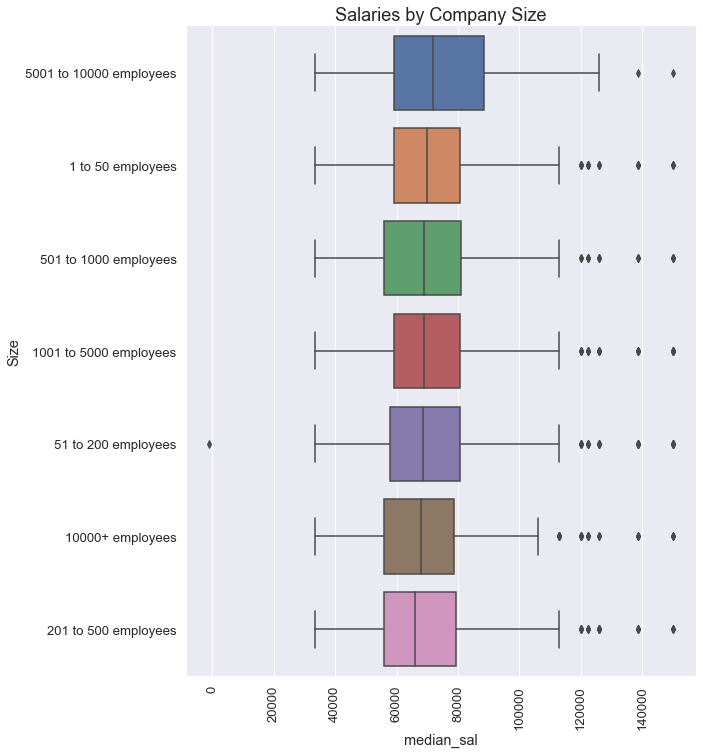

In [22]:
# remove unknown and -1 company size
df_filtered = df.loc[(df['Size'] != '-1') & (df['Size'] != 'Unknown')]

sns.set(font_scale=1.2)
sns.catplot(y='Size', x='median_sal', kind='box', data=df_filtered, height=10, aspect=1,\
           order=df_filtered.groupby('Size')['median_sal'].median().sort_values(ascending=False).index)

plt.title('Salaries by Company Size', fontsize='18')
plt.xticks(rotation=90)

It looks like there isn't a material difference in the amount salaries across companies of diffferent sizes.
One minor thing to point out could be that companies between 5001 and 10000 employees seem to have a larger range of salaries above the 50th percentile

## Seniority Levels

- If let's say you're a data analyst with some experience under your belt, where are the places that are hiring?
- What kind of salary should you expect as an experienced hire?
- What seniority levels are the jobs at?

In [23]:
def extract_seniority(t):
    t  = t.lower()
    if 'senior' in t:
        return 'Senior'
    elif 'manager' in t:
        return 'Manager'
    elif 'lead' in t:
        return 'Lead'
    elif 'principal' in t:
        return 'Principal'
    else:
        return 'Everyone Else'
    

df['Level'] = df['Job Title'].apply(extract_seniority)



(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]), <a list of 10 Text xticklabel objects>)

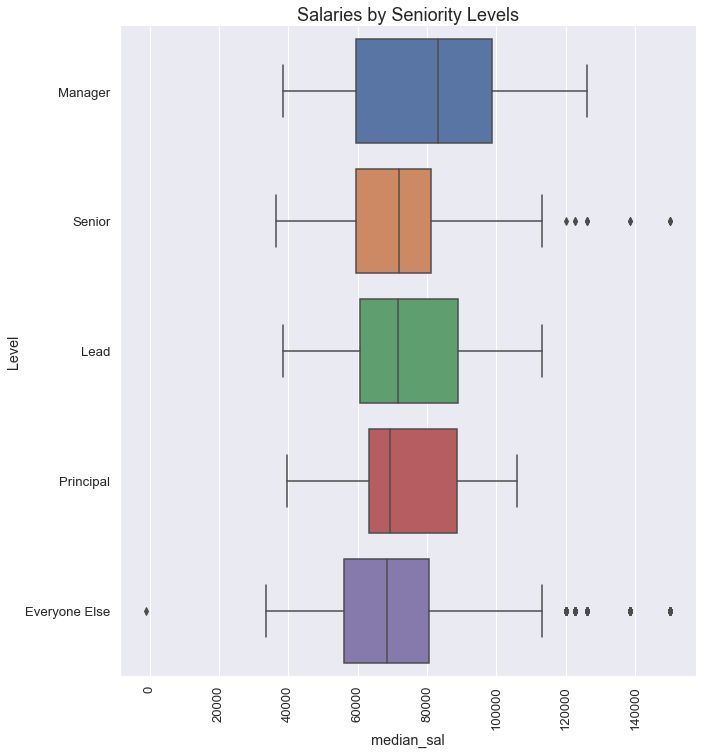

In [24]:
sns.set(font_scale=1.2)
sns.catplot(y='Level', x='median_sal', kind='box', data=df, height=10, aspect=1, \
            order=df.groupby('Level')['median_sal'].median().sort_values(ascending=False).index)

plt.title('Salaries by Seniority Levels', fontsize='18')
plt.xticks(rotation=90)

The results are a little surprising because 'Lead' and "Principal' are expected to pay higher than 'Senior' level roles. Maybe it's because the way we segment out the levels are a bit too simplistic and we're not considering other titles that could have senior in them. 
I'm most curious about why 'Principal' level jobs are paid so much lower relative to the others. 

Let's find out!

In [25]:
df[df['Job Title'].str.contains('principal', case=False)].tail(20)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,Easy Apply,low_bound_sal,upp_bound_sal,median_sal,state,Age,Level
56,56,"Principal Data Analyst, LATAM - Disney Streami...",$46K-$87K (Glassdoor est.),Job Summary:Comprised of Disney's internationa...,4.0,Walt Disney Co.\n4.0,"New York, NY","Burbank, CA",10000+ employees,1923,...,Media,$10+ billion (USD),"News Corp, WarnerMedia, NBCUniversal",-1,46,87,66500.0,NY,97,Principal
207,207,"Principal Data Analyst, LATAM – Disney Streami...",$60K-$110K (Glassdoor est.),"Job ID\n762918BR\n\nLocation\n\nNew York, New ...",3.6,Disney Streaming Services\n3.6,"New York, NY","New York, NY",501 to 1000 employees,2018,...,Information Technology,Unknown / Non-Applicable,-1,-1,60,110,85000.0,NY,2,Principal
249,249,"Principal Data Analyst, LATAM Disney Streaming...",$45K-$88K (Glassdoor est.),Job Summary:\nComprised of Disneys internation...,4.0,Walt Disney Company\n4.0,"New York, NY","Burbank, CA",10000+ employees,1923,...,Media,$10+ billion (USD),"News Corp, WarnerMedia, NBCUniversal",-1,45,88,66500.0,NY,97,Principal
305,305,Principal Business Analyst - Data Governance,$27K-$52K (Glassdoor est.),"At Rockstar Games, we create the games we woul...",4.1,Rockstar Games\n4.1,"New York, NY","New York, NY",1001 to 5000 employees,1998,...,Media,$10 to $25 million (USD),-1,-1,27,52,39500.0,NY,22,Principal
378,378,Principal Sales Operations Analyst - Oracle Da...,$98K-$114K (Glassdoor est.),Principal Sales Operations Analyst - Oracle Da...,3.6,Oracle\n3.6,"New York, NY","Redwood City, CA",10000+ employees,1977,...,Information Technology,$10+ billion (USD),"SAP, Salesforce, Microsoft",-1,98,114,106000.0,NY,43,Principal
410,410,Sr. Principal Metrics Analyst- Data Scientist,$48K-$96K (Glassdoor est.),Technology Architecture and Data is the enterp...,3.2,The Bank of New York Mellon\n3.2,"New York, NY","New York, NY",10000+ employees,1784,...,Finance,$10+ billion (USD),"State Street, Northern Trust, BlackRock",-1,48,96,72000.0,NY,236,Principal
641,641,Principal Data Management Analyst,$42K-$66K (Glassdoor est.),Northrop Grumman manufactures some of the worl...,3.8,Northrop Grumman\n3.8,"Woodland Hills, CA","Falls Church, VA",10000+ employees,1939,...,Aerospace & Defense,$10+ billion (USD),-1,-1,42,66,54000.0,CA,81,Principal
1986,1986,Principal Data Analyst,$82K-$116K (Glassdoor est.),Hinge Health is pioneering the world's most pa...,4.4,Hinge Health\n4.4,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2014,...,Health Care,$50 to $100 million (USD),-1,-1,82,116,99000.0,CA,6,Principal


Digging a bit deeper into the data, it turns out there are only 8 jobs with 'Principal' in their names so it could be easily skewed by extreme values. 

Of the 8 jobs above, a **Principal Business Analyst - Data Governance at Rockstar** only pays between **27K−52K** and a **Principal Data Management Analys** at **Northrop Grumman** only pays between **42K−66K** both significantly lower than the rest in the same group.

## Summary of Findings

So what did we learn so far?
- Education Training Services, Health Care Products Manufacturing, Drug & Health Stores, Gambling and Biotech & Pharmaceuticals related industries pay the most but jobs in these sectors might not be abundant
- There are most job postings in Information Technology and Business Services sectors
- Salaries in CA are the highest, followed by IL and AZ
- Older companies don't necessarily pay more, most of the job postings and high paying roles are from younger companies (< 40 years old)
- Company size doesn't have much impact on salaries
- Seniority levels don't necessarily get paid higher salaries across the board